# Heat Capacity Regression

The goal of this project is to take given data for $C_2F_4$ heat capacity (notated as Cp) as a function of temperature and perform linear regression to find a model to fit the data, then to create a plot to represent both the data and the model together.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit

First, I imported data from the given txt file and separated them into numpy arrays for temperature, given in $K$ (temp), and the collected heat capacity values, given in $J/mol-K$ (CpC2F4_data).


In [42]:
data = np.genfromtxt('HW2_calorimetry_data.txt', delimiter = '\t')
print(data)

[[    nan     nan]
 [   0.     78.48]
 [  50.     86.95]
 [ 100.     84.76]
 [ 150.     95.94]
 [ 200.    100.25]
 [ 250.    100.96]
 [ 300.    102.07]
 [ 350.    104.83]
 [ 400.    107.24]
 [ 450.    111.61]
 [ 500.    112.34]
 [ 550.    116.29]
 [ 600.    111.85]
 [ 650.    115.44]
 [ 700.    121.34]
 [ 750.    127.22]
 [ 800.    128.2 ]
 [ 850.    127.91]
 [ 900.    117.67]
 [ 950.    121.  ]
 [1000.    120.65]
 [1050.    130.48]
 [1100.    126.52]]


In [44]:
temp = np.array(data[1:,0]) #Units: K
CpC2F4_data = np.array(data[1:,1]) #Units: J/mol-K

Next, I created an array of my initial guesses and defined a function to calculate my SSE (sum of squared error).

In [30]:
# cong (constants guesses) is arranged [Aguess,Bguess,Cguess,Dguess]
cong = np.array([80,.012,-7e-5,14e-9])

In [40]:
def SSE(con):
    
    '''
    This function calculates the Sum of Squares Error.
    
    Input:
    con (array) - these are my initial guesses for constants.
    
    Output:
    SSEcalc (float) - this is the calculated SSE value using the initial constant guesses.
    '''
    
    guess = con[0] + con[1]*temp + con[2]*np.power(temp,2) + con[3]*np.power(temp,3)
    actual = CpC2F4_data
    # Guess and actual use the equation given, 𝐶𝑝 = A + BT + CT^2 + DT^3.
    
    Error = guess-actual
    Error_sq = np.power(Error,2)
    SSEcalc = np.sum(Error_sq)

    return SSEcalc

In [32]:
C2F4_SSE = SSE(cong)
print(C2F4_SSE)

74322.24187718748


Here, the minimize function from scipy.optimize is used to minimize the SSE function and return the desired constant values.

In [33]:
miniSSE = minimize(SSE,cong)
[Afinal,Bfinal,Cfinal,Dfinal] = miniSSE.x
print(miniSSE.x)

[ 8.00000000e+01  1.20003449e-02  1.10399329e-04 -8.21693933e-08]


Next, I created a function to calculate the heat capacity model using the optimized values above. The function uses this given equation, where A, B, C, and D are coefficients specific to the compound, and T is temperature:

$$ Cp = A + BT + CT^2 + DT^3 $$

In [34]:
def heat_cap(A,B,C,D,T):

    '''
    This function uses the equation above to calculate the heat capacities of certain molecules with given temperatures 
    using coefficients unique to each molecule.

    Inputs:
    A, B, C, D - coefficents defined above in constants array
    T - temperature array defined above

    Return
    Cp - this is the heat capacity for a specific molecule at a given temperature, T.
    
    '''
    Cp = A + B*T + C*np.power(T,2) + D*np.power(T,3)
    return Cp

In [37]:
Cp_model = heat_cap(Afinal,Bfinal,Cfinal,Dfinal,temp)

Finally, I graphed my heat capacity model with the minimized SSE as a line, and the given heat capacity data as discrete points on the same graph. The x-axis is temperature (K).

(0.0, 140.0)

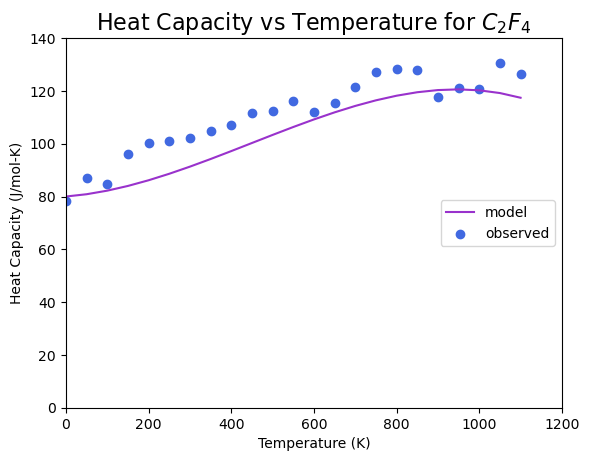

In [39]:
plt.plot(temp,Cp_model,label='model',color='darkorchid')
plt.scatter(temp,CpC2F4_data,label='observed',color='royalblue')

plt.title('Heat Capacity vs Temperature for $C_2F_4$',fontsize=16)
plt.legend(loc='center right')
plt.xlabel('Temperature (K)',fontsize=10)
plt.ylabel('Heat Capacity (J/mol-K)',fontsize=10)

plt.xlim([0,1200])
plt.ylim([0,140])